In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data

,Product_id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#checking missing values
data.isnull().sum()

Product_id    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
#for row and column
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product_id  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#checking for duplicates
data.duplicated().sum()


0

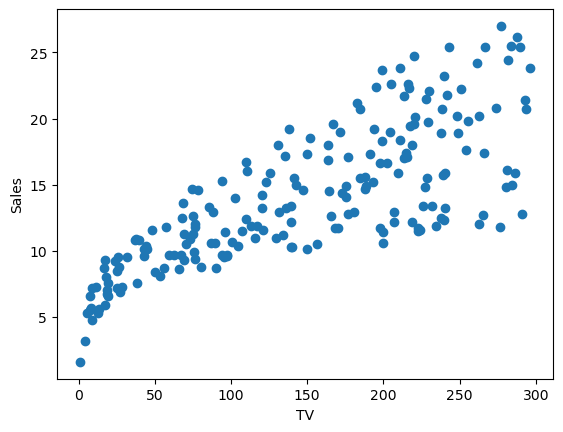

In [8]:
#ploting different individual features with target variable
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(x=data["TV"],y=data["Sales"])

<Axes: xlabel='Radio', ylabel='Sales'>

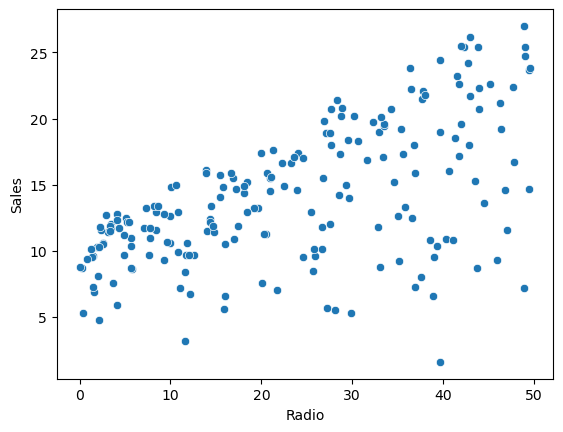

In [9]:
import seaborn as sns
sns.scatterplot(x=data["Radio"],y=data["Sales"])


<Axes: xlabel='Newspaper', ylabel='Sales'>

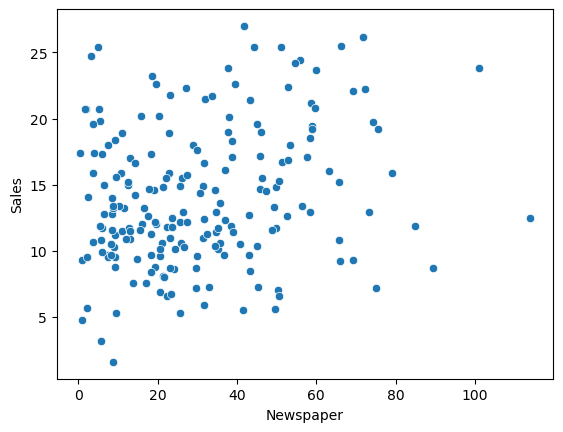

In [10]:
sns.scatterplot(x=data["Newspaper"],y=data["Sales"])

In [32]:
#splitting the data into X attributes and the Y target variable
X= data.drop("Sales",axis=1)
X

,Product_id,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [56]:
Y=data["Sales"] 
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

In [58]:
# making linear regression model object
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [59]:
#fitting the model to the dataset
model.fit(X_train,Y_train)

LinearRegression()

In [60]:
#predictions
y_pred=model.predict(X_test)

In [61]:
y_pred

array([16.56581778, 21.1804797 , 21.54440211, 10.89594674, 22.20422155,
       13.35811188, 21.19371189,  7.35723223, 13.28243942, 15.11907355,
        9.01025527,  6.53399652, 14.31067157,  8.9675858 ,  9.46556446,
       12.01266538,  8.91173461, 16.160977  , 10.29431598, 18.72083349,
       19.77226614, 13.76939567, 12.50085507, 21.53582335,  7.60425655,
        5.60788293, 20.91614465, 11.80237377,  9.08337367,  8.51666065,
       12.16659861,  9.96068717, 21.72664731, 12.77756633, 18.10644734,
       20.07544506, 14.26503177, 20.94306381, 10.84517829,  4.37943779,
        9.51113547, 12.41397184, 10.16460264,  8.08293205, 13.1656671 ,
        5.23369548,  9.28235707, 14.08483506,  8.69496881, 11.65949021,
       15.72025743, 11.63848467, 13.3458554 , 11.1568059 ,  6.33779081,
        9.75906265,  9.42324492, 24.25567017,  7.70231778, 12.15200343])

In [62]:
# evaluting for more accuracy with various metrics such as MSE and RMSE
from sklearn import metrics

print("MAE: ",metrics.mean_absolute_error(y_pred,Y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,Y_test)))
print("R2: ",metrics.r2_score(y_pred,Y_test))


MAE:  1.5120955091829715
RMSE:  1.9487551567518948
R2:  0.8467020431269712
